# Monty Hall 

<img src="image.png" alt="Image" style="width:35%">


The Monty Hall show refers to a famous probability puzzle based on a game show format. The scenario is named after the host of the television game show "Let's Make a Deal," Monty Hall. The classic problem goes like this:

1. The contestant is presented with three doors. Behind one of the doors is a valuable prize, such as a car, while behind the other two doors are less desirable prizes, like goats.
2. The contestant selects one of the three doors, but the door is not opened immediately.
3. Monty Hall, who knows what is behind each door, opens one of the other two doors to reveal a goat.
4. The contestant is then given the opportunity to stick with their original choice or switch to the remaining unopened door.

The surprising element of the Monty Hall problem lies in the optimal strategy. Counterintuitively, it is statistically advantageous for the contestant to switch doors after one is revealed, as it doubles their chances of winning the car. This paradoxical result often serves as a fascinating introduction to probability and decision-making, challenging common intuition and leading to interesting discussions in the field of mathematics and game theory.

In [1]:
import random
import pandas as pd

from dataclasses import dataclass
from typing import List

from IPython.display import display


NUM_DOORS = 3
NUM_GAMES = 1000

@dataclass
class Strategy:
    SWITCH = "switch"
    STAY = "stay"


@dataclass
class UserMode:
    USER = True
    BEHIND = False


def prepare_doors():
    doors = ["🐐"] * NUM_DOORS
    doors[random.randint(0, NUM_DOORS - 1)] = "🚗"
    random.shuffle(doors)
    return doors


def show_doors_behind(doors):
    df = pd.DataFrame(doors, columns=["Prize"])
    df.index += 1
    df.index.name = "Door"
    return df.T


def show_doors_user(doors, opened_doors=None):
    closed_doors = ["🚪"] * NUM_DOORS
    if opened_doors is not None:
        for opened_door in opened_doors:
            closed_doors[opened_door] = doors[opened_door]

    df = pd.DataFrame(closed_doors, columns=["Prize"])
    df.index += 1
    df.index.name = "Door"
    return df.T


def choose_initial_door():
    return random.randint(0, NUM_DOORS - 1)


def monty_opens(doors, chosen_initial_door):
    # Monty opens NUM_DOORS - 2 doors.
    possible_doors = [i for i in range(NUM_DOORS) if i != chosen_initial_door and doors[i] != "🚗"]
    opened_doors = random.sample(possible_doors, NUM_DOORS - 2)
    return opened_doors


def switch_door(chosen_initial_door: int, opened_doors: List[int]):
    # print(f"[DEBUG] chosen_initial_door: {chosen_initial_door}")
    # print(f"[DEBUG] opened_doors: {opened_doors}")
    [switched_door] = [i for i in range(NUM_DOORS) if i != chosen_initial_door and i not in opened_doors]
    # print(f"[DEBUG] switched_door: {switched_door}")
    return switched_door



def play(strategy, user_mode, verbose=True):
    if verbose:
        print("Let's play a game!")

    doors = prepare_doors()
    if verbose:
        print("Here are the doors:")
        if user_mode:
            display(show_doors_user(doors))
        else:
            display(show_doors_behind(doors))

    chosen_initial_door = choose_initial_door()

    if verbose:
        if user_mode:
            print(f"You initially chose door number {chosen_initial_door + 1} (I wonder what's behind it...)")
        else:
            print(f"You initially chose door number {chosen_initial_door + 1}: {doors[chosen_initial_door]}")

    # It would be multiple if we have more than 3 doors
    opened_doors = monty_opens(doors, chosen_initial_door)
    if verbose:
        print(f"Monty opened door(s) number {[door+1 for door in opened_doors]}\n")
        print("Here are the doors:")
        display(show_doors_user(doors, opened_doors))

    if strategy == Strategy.SWITCH:
        final_door = switch_door(chosen_initial_door, opened_doors)
        if verbose:
            if user_mode:
                print(f"You switched to door number {final_door + 1} (I wonder what's behind it...)")
            else:
                print(f"You switched to door number {final_door + 1}: {doors[final_door]}")

    else:
        final_door = chosen_initial_door
        if verbose:
            if user_mode:
                print(f"You stayed with door number {final_door + 1} (I wonder what's behind it...)")
            else:
                print(f"You stayed with door number {final_door + 1}: {doors[final_door]}")

    if doors[final_door] == "🚗":
        game_result = "WIN"
        if verbose:
            print("*** You won! ***")
    else:
        game_result = "LOSE"
        if verbose:
            print("*** You lost! ***")

    if verbose:
        print("\nHere are the doors:")
        display(show_doors_behind(doors))

    return game_result


In [2]:
result = play(Strategy.SWITCH, UserMode.USER, verbose=True)
print(result)

Let's play a game!
Here are the doors:


Door,1,2,3
Prize,🚪,🚪,🚪


You initially chose door number 2 (I wonder what's behind it...)
Monty opened door(s) number [1]

Here are the doors:


Door,1,2,3
Prize,🐐,🚪,🚪


You switched to door number 3 (I wonder what's behind it...)
*** You won! ***

Here are the doors:


Door,1,2,3
Prize,🐐,🐐,🚗


WIN


In [3]:
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter


def simulate(strategy, user_mode, num_games=NUM_GAMES, verbose=False):
    results = []
    for i in range(num_games):
        if verbose:
            print(f"Game {i+1}:")
        results.append(play(strategy, user_mode, verbose=verbose))
        if verbose:
            print("\n\n")

    results_counter = Counter(results)
    results_data = pd.DataFrame(
        list(results_counter.items()), columns=["Result", "Count"]
    )

    # Specify the order of the x-axis categories
    order = ["WIN", "LOSE"]

    display(results_data)

    win_rate = results_counter["WIN"] / num_games
    print(f"Win rate: {win_rate:.2f}")

    # Plot results with specified order
    sns.barplot(data=results_data, x="Result", y="Count", order=order)
    plt.title(f"strategy={strategy}")
    return plt

,Result,Count
0,LOSE,339
1,WIN,661


Win rate: 0.66


,Result,Count
0,LOSE,663
1,WIN,337


Win rate: 0.34


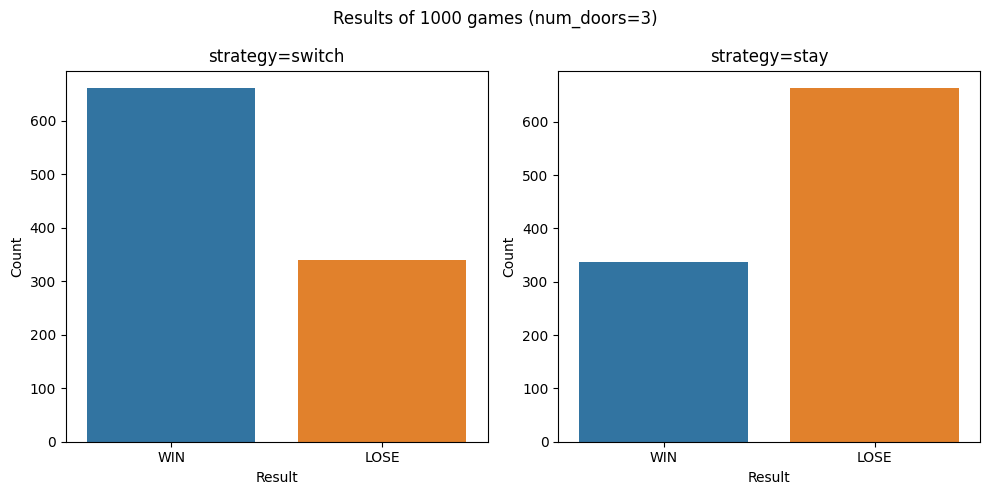

In [4]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
simulate(Strategy.SWITCH, UserMode.BEHIND, verbose=False)
plt.subplot(1, 2, 2)
simulate(Strategy.STAY, UserMode.BEHIND, verbose=False)
plt.suptitle(f"Results of {NUM_GAMES} games (num_doors={NUM_DOORS})")
plt.tight_layout()

The explanation is that, the probabilities, which was 1/3 for each door, will now be concentrated on the remaining door. Think about it, you had 2/3 chance of *missing* the car, it's _probably_ not the one you choose, and therefore it was more probable that the car was behind the remaining two doors after you've picked one. Now that Monty showed one of the hidden doors, that 2/3 chance of winning the car is now only attached to the remaining closed door. So, you should switch.

As seen by the simulation, the win rate is 2/3 when switching and 1/3 when staying. It is always better to switch. This would become more obvious if when we have more doors. Instead of having 3 doors, let's have 10 doors, and Monty opens 8 doors (not the one you chose and not the one with the car). Then, it is more obvious that the probability of the car being behind the door you chose is 1/10, while the probability of the car being behind the other door is 9/10.

In [5]:
NUM_DOORS = 10

result = play(Strategy.SWITCH, UserMode.USER, verbose=True)
print(result)

Let's play a game!
Here are the doors:


Door,1,2,3,4,5,6,7,8,9,10
Prize,🚪,🚪,🚪,🚪,🚪,🚪,🚪,🚪,🚪,🚪


You initially chose door number 6 (I wonder what's behind it...)
Monty opened door(s) number [7, 1, 4, 10, 2, 3, 9, 8]

Here are the doors:


Door,1,2,3,4,5,6,7,8,9,10
Prize,🐐,🐐,🐐,🐐,🚪,🚪,🐐,🐐,🐐,🐐


You switched to door number 5 (I wonder what's behind it...)
*** You won! ***

Here are the doors:


Door,1,2,3,4,5,6,7,8,9,10
Prize,🐐,🐐,🐐,🐐,🚗,🐐,🐐,🐐,🐐,🐐


WIN


,Result,Count
0,WIN,898
1,LOSE,102


Win rate: 0.90


,Result,Count
0,LOSE,896
1,WIN,104


Win rate: 0.10


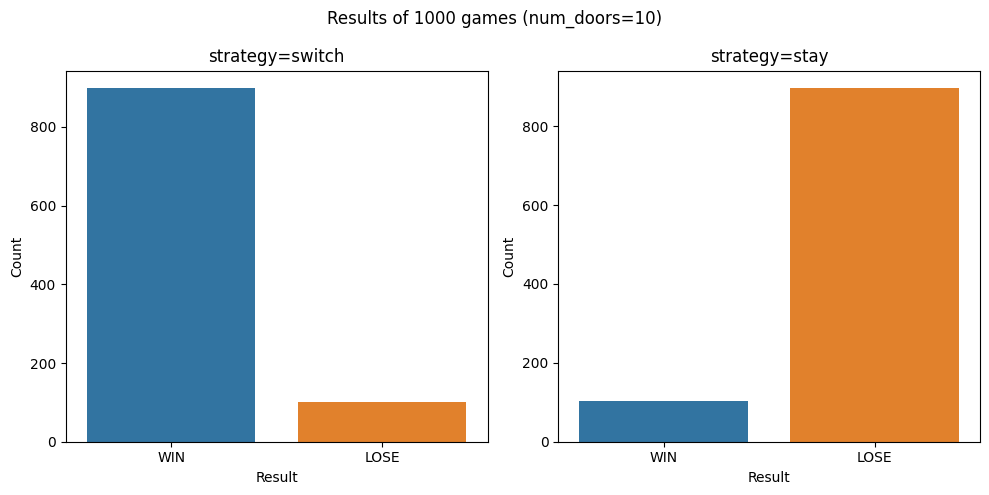

In [6]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
simulate(Strategy.SWITCH, UserMode.BEHIND, verbose=False)
plt.subplot(1, 2, 2)
simulate(Strategy.STAY, UserMode.BEHIND, verbose=False)
plt.suptitle(f"Results of {NUM_GAMES} games (num_doors={NUM_DOORS})")
plt.tight_layout()

How about we have 100 doors?

,Result,Count
0,WIN,992
1,LOSE,8


Win rate: 0.99


,Result,Count
0,LOSE,992
1,WIN,8


Win rate: 0.01


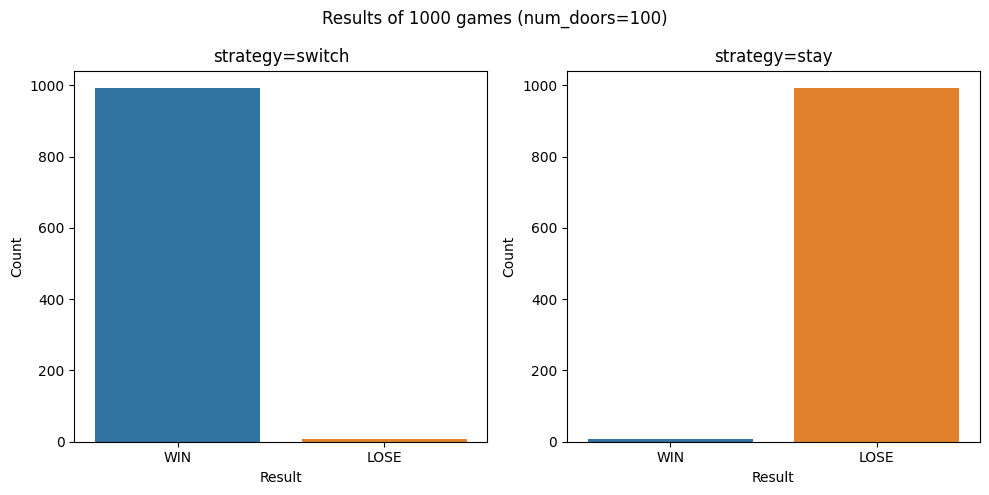

In [7]:
NUM_DOORS = 100

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
simulate(Strategy.SWITCH, UserMode.BEHIND, verbose=False)
plt.subplot(1, 2, 2)
simulate(Strategy.STAY, UserMode.BEHIND, verbose=False)
plt.suptitle(f"Results of {NUM_GAMES} games (num_doors={NUM_DOORS})")
plt.tight_layout()

I think we got the point. We now know how to maximize the chance of driving home with a beautiful car. But what if we want to maximize the chance of driving home with a beautiful car AND a goat? 🤔 Question is left to the reader as an exercise. 😄